# Telemonitoring Parkinson's Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

sns.set_style("whitegrid")

This data set contains biomedical voice measurements from a study of subjects with early-stage Parkinson's disease. The goal is to predict the clinician's Parkinson's disease symptom score on the UPDRS scale.
The table data contains several predictor variables and a response in an interior column named "total_UPDRS". The data has been split into training and test sets: dataTrain and dataTest.

In [2]:
data_train = pd.read_excel("./data/parkinsons.xlsx", sheet_name="dataTrain")
X_train, y_train = data_train.drop(columns=["total_UPDRS"]), data_train["total_UPDRS"]
data_test = pd.read_excel("./data/parkinsons.xlsx", sheet_name="dataTest")
X_test, y_test = data_test.drop(columns=["total_UPDRS"]), data_test["total_UPDRS"]

data_train.head()

,age,sex,test_time,total_UPDRS,Jitter___,Jitter_Abs_,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB_,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
0,65,0,98.415,7.0,0.0031,0.000026,0.0012,0.0018,0.0037,0.0155,0.135,0.0074,0.0091,0.0138,0.0222,0.0051,25.218,0.3880,0.7174,0.1636
1,65,0,102.420,7.0,0.0042,0.000033,0.0017,0.0022,0.0051,0.0254,0.224,0.0123,0.0167,0.0225,0.0368,0.0131,25.676,0.4551,0.6969,0.1733
2,65,0,109.400,7.0,0.0051,0.000041,0.0026,0.0028,0.0078,0.0399,0.347,0.0215,0.0231,0.0313,0.0646,0.0180,22.428,0.4945,0.6346,0.2048
3,65,0,130.390,7.0,0.0031,0.000024,0.0011,0.0017,0.0033,0.0170,0.148,0.0083,0.0108,0.0145,0.0248,0.0055,25.319,0.4647,0.6450,0.1482
4,65,0,165.360,7.0,0.0052,0.000040,0.0022,0.0028,0.0066,0.0219,0.189,0.0104,0.0133,0.0184,0.0313,0.0179,23.065,0.5374,0.7059,0.2132


Fit model then predict response for test data.

In [3]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print("R^2 =", regressor.score(X_test, y_test))
print("MSE =", mean_squared_error(y_test, y_pred))

R^2 = 0.943941898291585
MSE = 6.532147980981839


Compare predicted and actual responses.

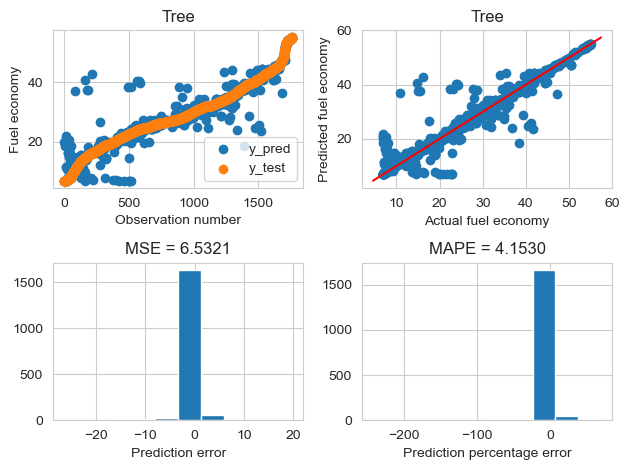

In [4]:
fig, axs = plt.subplots(2, 2)

# Plot against observation number
axs[0, 0].scatter(range(len(y_pred)), y_pred)
axs[0, 0].scatter(range(len(y_test)), y_test)
axs[0, 0].set_xlabel('Observation number')
axs[0, 0].set_ylabel('Fuel economy')
axs[0, 0].legend(["y_pred", "y_test"])
axs[0, 0].set_title("Tree")

# Plot predicted and actual against each other
axs[0, 1].scatter(y_test, y_pred)
xlim = axs[0, 1].get_xlim()
ylim = axs[0, 1].get_ylim()
axs[0, 1].plot(xlim, ylim, color='r')
axs[0, 1].set_xlabel('Actual fuel economy')
axs[0, 1].set_ylabel('Predicted fuel economy')
axs[0, 1].set_title("Tree")

# Distribution of errors
error = y_test - y_pred
MSE = np.mean(error**2)
axs[1, 0].hist(error)
axs[1, 0].set_title('MSE = {:.4f}'.format(MSE))
axs[1, 0].set_xlabel('Prediction error')

# Distribution of percentage errors
error = 100 * error / y_test
MAPE = np.mean(np.abs(error))
axs[1, 1].hist(error)
axs[1, 1].set_title('MAPE = {:.4f}'.format(MAPE))
axs[1, 1].set_xlabel('Prediction percentage error')

plt.tight_layout()
plt.show()